## Introduction

In this guided project I shall clean and analyze employee exit surveys - from the Department of Education, Training and Employment and Technical And FUrther Education institute of Queensland, Australia. 

The project aimes at figuring out the following: 
        - Is there some kind of dissatisfaction that caused the employees that only worked for a short period to resign? If so, does this affect the employees that have been there longer? 
        - And the same question except for age groups instead of the time worked at the institute. 
        
The data consists of the following columns:

ID/Record ID - this identifies the participant

SeparationType/"Reason for ceasing employment"  - the reason behind the end of the employment.

Cease Date&DETE Start date / "lengthofserviceoverall"  the two (or one) column describing the employment's length


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
dete_survey=pd.read_csv("dete_survey.csv")
tafe_survey=pd.read_csv("tafe_survey.csv")
%matplotlib inline
import seaborn as sns# I need this for a heatmap in the exploration part

In [3]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [5]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [6]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [7]:
dete_isnull=[]
for col in dete_survey.columns:
    dete_isnull.append(dete_survey.isnull()[col].sum())
    print(col +": "+str(dete_isnull[-1]))


ID: 0
SeparationType: 0
Cease Date: 0
DETE Start Date: 0
Role Start Date: 0
Position: 5
Classification: 367
Region: 0
Business Unit: 696
Employment Status: 5
Career move to public sector: 0
Career move to private sector: 0
Interpersonal conflicts: 0
Job dissatisfaction: 0
Dissatisfaction with the department: 0
Physical work environment: 0
Lack of recognition: 0
Lack of job security: 0
Work location: 0
Employment conditions: 0
Maternity/family: 0
Relocation: 0
Study/Travel: 0
Ill Health: 0
Traumatic incident: 0
Work life balance: 0
Workload: 0
None of the above: 0
Professional Development: 14
Opportunities for promotion: 87
Staff morale: 6
Workplace issue: 34
Physical environment: 5
Worklife balance: 7
Stress and pressure support: 12
Performance of supervisor: 9
Peer support: 10
Initiative: 9
Skills: 11
Coach: 55
Career Aspirations: 76
Feedback: 30
Further PD: 54
Communication: 8
My say: 10
Information: 6
Kept informed: 9
Wellness programs: 56
Health & Safety: 29
Gender: 24
Age: 11
Abor

In [8]:
tafe_nulls=[]
for col in tafe_survey.columns:
    tafe_nulls.append(tafe_survey.isnull()[col].sum())
    print(col +": "+str(tafe_nulls[-1]))


Record ID: 0
Institute: 0
WorkArea: 0
CESSATION YEAR: 7
Reason for ceasing employment: 1
Contributing Factors. Career Move - Public Sector : 265
Contributing Factors. Career Move - Private Sector : 265
Contributing Factors. Career Move - Self-employment: 265
Contributing Factors. Ill Health: 265
Contributing Factors. Maternity/Family: 265
Contributing Factors. Dissatisfaction: 265
Contributing Factors. Job Dissatisfaction: 265
Contributing Factors. Interpersonal Conflict: 265
Contributing Factors. Study: 265
Contributing Factors. Travel: 265
Contributing Factors. Other: 265
Contributing Factors. NONE: 265
Main Factor. Which of these was the main factor for leaving?: 589
InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction: 94
InstituteViews. Topic:2. I was given access to skills training to help me do my job better: 89
InstituteViews. Topic:3. I was given adequate opportunities for personal development: 92
InstituteViews. Topic:4. I was given adequate 

## Takeaways - basic exploration

While the DETE survey is quite readable - despite the many columns - the TAFE survey will be a nightmare to deal with due to these long (and many at that) column names. 

###  Missing values

In the DETE survey there also seem to be a very low null-count for most of the columns, and a few very high (~90+%) counts toward the end, that can be removed easily. 

In the TAFE case there are a lot more "middle ground" columns at first glance, but... well, the idea is that this shouldn't be "at first glance", if we have tools to plot.

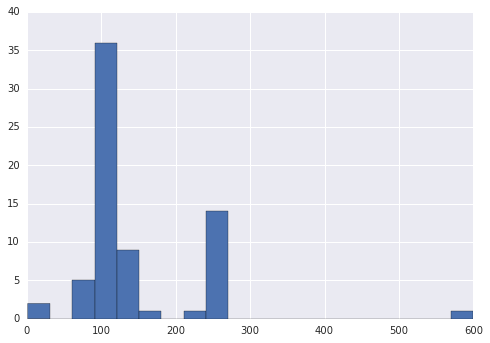

In [9]:
pd.Series(tafe_nulls).hist(bins=20,range=[1,600])

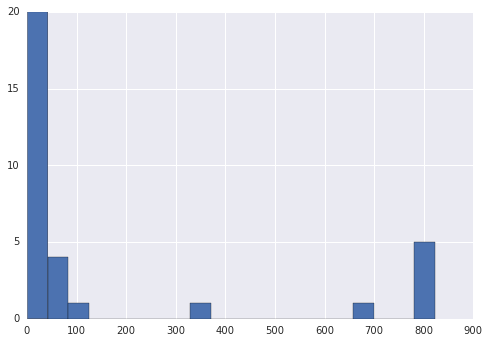

In [10]:
pd.Series(dete_isnull).hist(bins=20, range=[1,822])



The plotting showed that my feelings were justified. 
One more plot to look at the distribution of these nans...

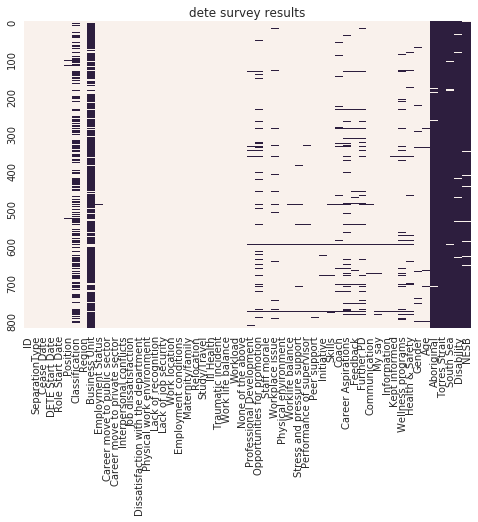

In [11]:
fig, ax=plt.subplots()
sns.heatmap(dete_survey.isnull(), cbar=False, ax=ax, yticklabels=100)
ax.set_title("dete survey results")

This is ugly as anything, but it can show that the last 4 columns are basically useless, as well as the "business unit" column. Aside from that, the data seems to be relatively nice with a few holes...



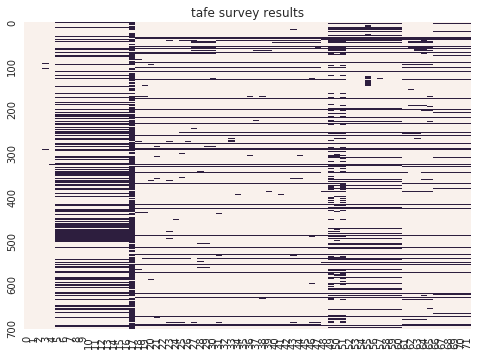

In [12]:
fig, ax=plt.subplots()
sns.heatmap(tafe_survey.isnull(), cbar=False, ax=ax, yticklabels=100)
ax.set_xticklabels(np.arange(len(tafe_survey.columns)))#too long column names
ax.set_title("tafe survey results")

In the TAFE survey the structure of missing values is very different. It seems that there are "blocks" that are either missing or not but they seem to do it together in the majority of cases. This means that the data could be clustered into categories based on which "blocks" are missing from the exit survey...

In [13]:
for col in dete_survey.columns:
    if len(dete_survey[col].unique())<100:# I don't want the essays to be listed here
        print(col)
        print(dete_survey[col].sort_values().value_counts())

SeparationType
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64
Cease Date
2012          344
2013          200
01/2014        43
12/2013        40
09/2013        34
Not Stated     34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
04/2014         2
04/2013         2
07/2014         2
08/2012         2
02/2014         2
07/2012         1
09/2010         1
2014            1
07/2006         1
09/2014         1
11/2012         1
2010            1
Name: Cease Date, dtype: int64
DETE Start Date
Not Stated    73
2011          40
2007        

## Data cleaning

I knew the dete survey was too "nice" to be true... it has "not stated" values which are... not classified as NaN because of course not, but still technically are NaNs.

Also, I have a single value of "200" in the DETE start date what would be... beyond impressive should it be true, I think we are dealing with a vampire or lich here...

In [14]:
for col in tafe_survey.columns:
    if len(tafe_survey[col].unique())<100:# I don't want the essays to be listed here
        print(col)
        print(tafe_survey[col].sort_values().value_counts())

Institute
Brisbane North Institute of TAFE         161
Southern Queensland Institute of TAFE    142
Central Queensland Institute of TAFE     108
Sunshine Coast Institute of TAFE          91
Tropical North Institute of TAFE          70
SkillsTech Australia                      57
Southbank Institute of Technology         43
Barrier Reef Institute of TAFE            14
Mount Isa Institute of TAFE               12
Wide Bay Institute of TAFE                 2
The Bremer Institute of TAFE               1
Metropolitan South Institute of TAFE       1
Name: Institute, dtype: int64
WorkArea
Non-Delivery (corporate)    432
Delivery (teaching)         270
Name: WorkArea, dtype: int64
CESSATION YEAR
2011.0    268
2012.0    235
2010.0    103
2013.0     85
2009.0      4
Name: CESSATION YEAR, dtype: int64
Reason for ceasing employment
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Terminat

In [15]:
dete_survey.replace("Not Stated", np.NaN, inplace=True)#replace the not-stated 




Now I shall drop the columns that are not needed to measure satisfaction in order to get something that is easier to handle.

In [16]:
dete_survey.drop(dete_survey.columns[28:49],axis=1, inplace=True)
tafe_survey.drop(tafe_survey.columns[17:66],axis=1, inplace=True)

After all, the columns we want to look at with this are the following for DETE (TAFE):

        -ID (Record ID)
        - SeparationType (Reason for ceasing employment)
        - Cease Date (CESSATION YEAR)
        - DETE Start Date ()
        - (LengthofServiceOverall. Overall Length of Serviceat Institute (in years))
        - Age (CurrentAge.Current Age)
        - Gender (Gender.What is your Gender?)

I shall standardize this since evenetually combining the two frames would be nice, and also because these names are terrible to work with (especially TAFE)



In [17]:
pseu_col=dete_survey.columns
remap_dict={}
for item in pseu_col:
    remap_dict[item]=item.strip().lower().replace(" ", "_")
    #I know I could've excluded the 4 values below from the iteration but it takes no time...
dete_survey.rename(columns=remap_dict, inplace=True)
dete_survey.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Standardizing the TAFE is a bit more annoying, but here it goes:

In [18]:
remap_dict={'Record ID': 'id','CESSATION YEAR': 'cease_date','Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service','LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service' }
tafe_survey.rename(columns=remap_dict, inplace=True)
tafe_survey.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Neat, this is done as well!

## Resignations

Here I would reiterate what the endgoal is: 
"Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?"

Now for this I can introduce the first big cut to the data: 
I shall only keep the resignations at first - Since they are the core of the investigation. Should the investigation find something definite, I think it would be wise to look once again at the whole data to see how prominent the found issue is with other employees. 



In [19]:
dete_resignations=dete_survey[dete_survey["separationtype"].str[:11]=="Resignation"]
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994,1997,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009,2009,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997,2008,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009,2009,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [20]:
tafe_resignations=tafe_survey[tafe_survey.separationtype=="Resignation"]
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


Continue looking for inconsistencies

In [21]:
dete_resignations["cease_date"].str[-4:].astype(float).describe()

count     300.00000
mean     2012.60000
std         0.75403
min      2006.00000
25%      2012.00000
50%      2013.00000
75%      2013.00000
max      2014.00000
Name: cease_date, dtype: float64

No issues here

In [22]:
dete_resignations["dete_start_date"].str[-4:].astype(float).describe()

count     283.000000
mean     2002.067138
std         9.914479
min      1963.000000
25%      1997.000000
50%      2005.000000
75%      2010.000000
max      2013.000000
Name: dete_start_date, dtype: float64

These are also all believable, though this column had 17 nan values.

let's see the age of these employees, as I have a suspicion that the employees that started a long ago will have the n/a values.

In [23]:
dete_resignations[np.isnan(dete_resignations.dete_start_date.astype(float))]["age"].str[:2].astype(float).describe()

count    25.000000
mean     43.800000
std      13.546217
min      21.000000
25%      36.000000
50%      46.000000
75%      56.000000
max      61.000000
Name: age, dtype: float64

In [24]:
dete_resignations[~np.isnan(dete_resignations.dete_start_date.astype(float))]["age"].str[:2].astype(float).describe()

count    281.000000
mean      39.893238
std       11.679775
min       20.000000
25%       31.000000
50%       41.000000
75%       51.000000
max       61.000000
Name: age, dtype: float64

Well... this is not definitive, there are by all means, these employees tend to be in the percentiles uniformly 5 years older, but that is well within the standard deviation, and with a sample size of 17 (of which 3 are nan) a few cases can skew the metric this much, so... I did not get closer...

In [25]:
tafe_resignations["cease_date"].astype(float).describe()

count     335.000000
mean     2011.394030
std         1.005952
min      2009.000000
25%      2011.000000
50%      2011.000000
75%      2012.000000
max      2013.000000
Name: cease_date, dtype: float64

I don't see anything wrong with this either

For the TAFE we already have "institute_service". 
For DETE we shall create it.

In [26]:
dete_resignations=dete_resignations.assign(institute_service=dete_resignations.cease_date.str[-4:].astype(float)-dete_resignations.dete_start_date.str[-4:].astype(float))
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,05/2012,1994,1997,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,07/2012,2009,2009,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012,1997,2008,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012,2009,2009,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


## Dissatisfied employees

Now comes the gathering of dissatisfaction...

With TAFE I have a relatively straightforward route: It has a column "JOb dissatisfaction" and one called "dissatisfaction". Out of these two, if any is True, then the dissatisfaction is present.

With DETE it is a bit more tricky... There are a number of columns that can indicate dissatisfaction. These are: 
    - job_dissatisfaction
    - dissatisfaction_with_the_department
    - physical_work_environment
    - lack_of_recognition
    - lack_of_job_security
    - work_location /This is debatable, I don't think I would use this unless it is a MASS problem/
    - employment_conditions
    - work_life_balance
    - workload
If any of these was the cause of resignation, that can be called as a dissatisfied employee. However, in the same time I'd like to keep these columns for later - if there is indeed some kind of dissatisfaction, it would be good to know which one is the main contributing factor.

In [27]:
dissat=tafe_resignations["Contributing Factors. Dissatisfaction"].map({"-": False, "Contributing Factors. Dissatisfaction ": True, "NaN": np.nan})
jobdissat=tafe_resignations["Contributing Factors. Job Dissatisfaction"].map({"-": False, "Job Dissatisfaction": True, "NaN": np.nan})



tafe_resignations=tafe_resignations.assign(dissatisfied=pd.DataFrame([dissat, jobdissat]).transpose().any(axis=1, skipna=False))
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False


Now we have a dissatisfied column for tafe. DO the same for dete:

In [28]:
reasons=["job_dissatisfaction","dissatisfaction_with_the_department","physical_work_environment",
    "lack_of_recognition", "lack_of_job_security", "work_location","employment_conditions", "work_life_balance", "workload"]
dete_resignations=dete_resignations.assign(dissatisfied=dete_resignations[reasons].any(axis=1, skipna=False))

In [29]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False
5,6,Resignation-Other reasons,05/2012,1994,1997,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True
8,9,Resignation-Other reasons,07/2012,2009,2009,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False
9,10,Resignation-Other employer,2012,1997,2008,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True
11,12,Resignation-Move overseas/interstate,2012,2009,2009,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False


Done, Now I also have a "dissatisfied" column in both cases

## Combining the two surveys


Time to mark the two frames and concatenate them.

In [30]:
dete_resignations=dete_resignations.assign(institute="DETE")
tafe_resignations=tafe_resignations.assign(institute="TAFE")
combined=pd.concat([dete_resignations, tafe_resignations])
combined

,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Dissatisfaction,Contributing Factors. Ill Health,Contributing Factors. Interpersonal Conflict,Contributing Factors. Job Dissatisfaction,Contributing Factors. Maternity/Family,Contributing Factors. NONE,Contributing Factors. Other,...,role_service,role_start_date,separationtype,south_sea,study/travel,torres_strait,traumatic_incident,work_life_balance,work_location,workload
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2006,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1997,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2008,Resignation-Other employer,NaN,False,NaN,False,False,False,False
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009,Resignation-Move overseas/interstate,NaN,False,NaN,False,False,False,False
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1998,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2010,Resignation-Other employer,NaN,False,NaN,False,False,False,False
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1982,Resignation-Other employer,NaN,False,NaN,False,False,False,False
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009,Resignation-Other reasons,NaN,False,NaN,False,False,False,False


In [44]:
combined=combined.dropna(axis=1, thresh=500)
combined.reset_index(inplace=True, drop=True)# I don't need the index since I have an ID
combined.head()

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
0,36-40,05/2012,False,Permanent Full-time,Female,4.0,DETE,7,Teacher,Resignation-Other reasons
1,41-45,05/2012,True,Permanent Full-time,Female,6.0,DETE,18,Guidance Officer,Resignation-Other reasons
2,31-35,07/2012,False,Permanent Full-time,Female,9.0,DETE,3,Teacher,Resignation-Other reasons
3,46-50,2012,True,Permanent Part-time,Female,10.0,DETE,15,Teacher Aide,Resignation-Other employer
4,31-35,2012,False,Permanent Full-time,Male,12.0,DETE,3,Teacher,Resignation-Move overseas/interstate


Removed the columns that were unique to either frame, and combined them to one

In [32]:
combined.institute_service.value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
25.0                   2
26.0                   2
36.0                   2
28.0                   2
30.0                   2
42.0                   1


## Defining seniority, new employees

These are a bunch of different ages, but it is not that hard to convert them into something unifrom based on this article: https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage.  


I will use slightly modified definitions: 
New: Less than 3 years at a company
Experienced: 3-6 years at a company
Established: 7-10 years at a company
Veteran: 11 or more years at a company

The next step would be to use these and map the institut_service accordingly.

In [61]:
def mapping_func(exper):
    if exper==
    nr=re.search(r"[0-9][0-9]?", exper).group(0)
    try:
        nr=int(nr)
    except ValueError:
        return np.nan#I couldn't define experience
    if nr<4:
        return "New"
    elif nr<7:
        return "Experienced"
    elif nr<11:
        return "Estabilished"
    else:
        return "Veteran"


In [71]:
combined=combined.assign(service_cat=combined[~pd.isnull(combined.institute_service)].institute_service.astype(str).map(mapping_func))
combined.head()

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype,service_cat
0,36-40,05/2012,False,Permanent Full-time,Female,4.0,DETE,7,Teacher,Resignation-Other reasons,Estabilished
1,41-45,05/2012,True,Permanent Full-time,Female,6.0,DETE,18,Guidance Officer,Resignation-Other reasons,Veteran
2,31-35,07/2012,False,Permanent Full-time,Female,9.0,DETE,3,Teacher,Resignation-Other reasons,New
3,46-50,2012,True,Permanent Part-time,Female,10.0,DETE,15,Teacher Aide,Resignation-Other employer,Veteran
4,31-35,2012,False,Permanent Full-time,Male,12.0,DETE,3,Teacher,Resignation-Move overseas/interstate,New


Now I have service categories instead of the different numbering methods...

In [73]:
combined.dissatisfied.value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

Indeed, more than 1/3rd of the resigned employees are dissatisfied.
The 8 'nan' employees are not a statistically significant sample if added to either groups, or they just can be left out...

In [76]:
combined[pd.isnull(combined.dissatisfied)]

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype,service_cat
322,NaN,2010,NaN,NaN,NaN,6.341770e+17,TAFE,NaN,NaN,Resignation,NaN
324,NaN,2010,NaN,NaN,NaN,6.341779e+17,TAFE,NaN,NaN,Resignation,NaN
345,NaN,2010,NaN,NaN,NaN,6.342141e+17,TAFE,NaN,NaN,Resignation,NaN
466,NaN,2011,NaN,NaN,NaN,6.345510e+17,TAFE,NaN,NaN,Resignation,NaN
472,NaN,2011,NaN,NaN,NaN,6.345581e+17,TAFE,NaN,NaN,Resignation,NaN
523,NaN,2012,NaN,NaN,NaN,6.346963e+17,TAFE,NaN,NaN,Resignation,NaN
543,NaN,NaN,NaN,NaN,NaN,6.347827e+17,TAFE,NaN,NaN,Resignation,NaN
627,NaN,2013,NaN,NaN,NaN,6.350124e+17,TAFE,NaN,NaN,Resignation,NaN


Since they are almost fully empty rows, I shall just leave them out.

In [83]:
combined.drop(combined[pd.isnull(combined.dissatisfied)].index, axis=0, inplace=True)
combined.head()

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype,service_cat
0,36-40,05/2012,False,Permanent Full-time,Female,4.0,DETE,7,Teacher,Resignation-Other reasons,Estabilished
1,41-45,05/2012,True,Permanent Full-time,Female,6.0,DETE,18,Guidance Officer,Resignation-Other reasons,Veteran
2,31-35,07/2012,False,Permanent Full-time,Female,9.0,DETE,3,Teacher,Resignation-Other reasons,New
3,46-50,2012,True,Permanent Part-time,Female,10.0,DETE,15,Teacher Aide,Resignation-Other employer,Veteran
4,31-35,2012,False,Permanent Full-time,Male,12.0,DETE,3,Teacher,Resignation-Move overseas/interstate,New


In [101]:
combined.dissatisfied=combined.dissatisfied.astype(bool)#This was needed for whatever reason I lost the type somewhere... I guess when still had NA-s...
combined.pivot_table(values="dissatisfied", columns="service_cat")

service_cat,Estabilished,Experienced,New,Veteran
dissatisfied,0.516129,0.404494,0.289855,0.485294


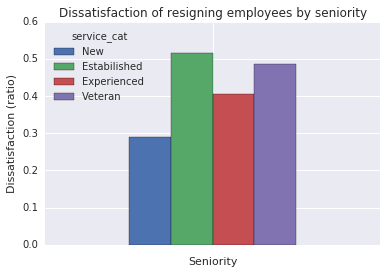

In [126]:
fig, ax=plt.subplots()
(combined.pivot_table(values="dissatisfied", columns="service_cat")[["New", "Estabilished", "Experienced", "Veteran"]]).plot(kind="bar",ax=ax, tick_label="")
ax.set_xticklabels("")
ax.set_xlabel("Seniority")
ax.set_ylabel("Dissatisfaction (ratio)")
ax.set_title("Dissatisfaction of resigning employees by seniority")

## Conclusion & outlook

So... going back to the original question, one could say that new employees have a much lower dissatisfaction rate, but employees with a bit more experience ("Estabilished") have the highest, so that is something one could look into.

Of course, this project can be continued and more angles can be found for the same problem: 

Altough the original question (regarding the dissatisfaction of new employees) have more or less been answered, the answer raises a new question - about the more senior employees who seem to have a much higher ratio of dissatisfaction. 

Another interesting point is that for this project I have used two separate institutions, so they might produce different results when looked at separately. 


